<a href="https://colab.research.google.com/github/Tech-Natra/notch_ml_project/blob/main/notebook/Unsupervised_Insights_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Strategy for Unsupervised Insights on Housing Data



1.   Enhancing Housing data attributes (if any)
2.   Important attributes to consider.
3.   For Numerical Variables, identifying the skewness in distribution (if any) and correlations.
4.   For Categorical Variable, identify their Cardinality.
5.   Analyzing interactions between attributes.
6.   Feature Engineering
7.   Identifying NULL values.
8.   Analyzing selected features using PCA and TSNE
9.   Applying Kmeans clustering algorithm for different values of K
10.  Evaluating silhouette score for multiple values of K.
11.  Evaluating of impact of multiple values of K on Housing data.

###Step 0: Data Pull

In [3]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = "https://github.com/Tech-Natra/notch_ml_project/raw/main/Data/housing/train.csv.zip"
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

###Step 1: Data Loading / Data Processing

In [4]:
house_data = pd.read_csv("/content/train.csv", sep=",")

In [5]:
house_data.shape

(1460, 81)

In [6]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
def indicator_if_remodel(x):
  if x["YearBuilt"] == x["YearRemodAdd"]:
    return 0
  return 1

house_data["Remodel_Flg"] = house_data[["YearBuilt", "YearRemodAdd"]].apply(lambda x: indicator_if_remodel(x), axis = 1)

In [8]:
house_data["Remodel_Flg"].value_counts()

0    764
1    696
Name: Remodel_Flg, dtype: int64

In [9]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
house_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [11]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
house_data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

####Step 1.2 Useful Categorical / Numerical Variables

In [13]:
categorical_variable = ["HouseStyle","OverallQual", "GarageFinish", "GarageType",
                        "Foundation","Exterior1st", "Remodel_Flg", "YearBuilt",
                        "LotConfig", "GarageCars", "BedroomAbvGr", "KitchenAbvGr", "FullBath"]

In [14]:
numerical_variables = ["LotArea", "TotalBsmtSF",
                       "1stFlrSF", "2ndFlrSF", "LotFrontage"]

<Axes: xlabel='2ndFlrSF', ylabel='Density'>

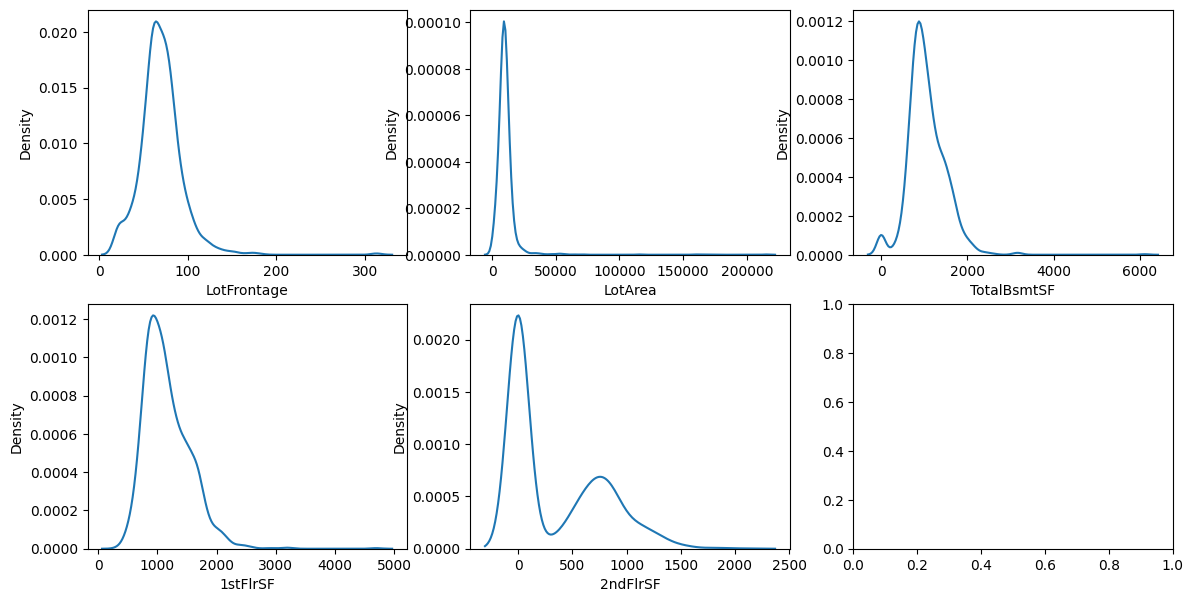

In [15]:
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize=(14,7))
sns.kdeplot(data=house_data, x="LotFrontage", ax= axs[0][0])
#axs[0].set_title("LotFrontage Distribution")

sns.kdeplot(data=house_data, x="LotArea", ax= axs[0][1])
#axs[1].set_title("LotArea Distribution")

sns.kdeplot(data=house_data, x="TotalBsmtSF", ax= axs[0][2])
#axs[2].set_title("TotalBsmtSF Distribution")

sns.kdeplot(data=house_data, x="1stFlrSF", ax= axs[1][0])
#axs[2].set_title("TotalBsmtSF Distribution")

sns.kdeplot(data=house_data, x="2ndFlrSF", ax= axs[1][1])
#axs[2].set_title("TotalBsmtSF Distribution")

In [16]:
numr_df = house_data[["LotFrontage", "LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]]
ncorr = numr_df.corr()
ncorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF
LotFrontage,1.00,0.43,0.39,0.46,0.08
LotArea,0.43,1.00,0.26,0.30,0.05
TotalBsmtSF,0.39,0.26,1.00,0.82,-0.17
1stFlrSF,0.46,0.30,0.82,1.00,-0.20
2ndFlrSF,0.08,0.05,-0.17,-0.20,1.00


####Step 1.3 Analzying Categorical Variables

[]

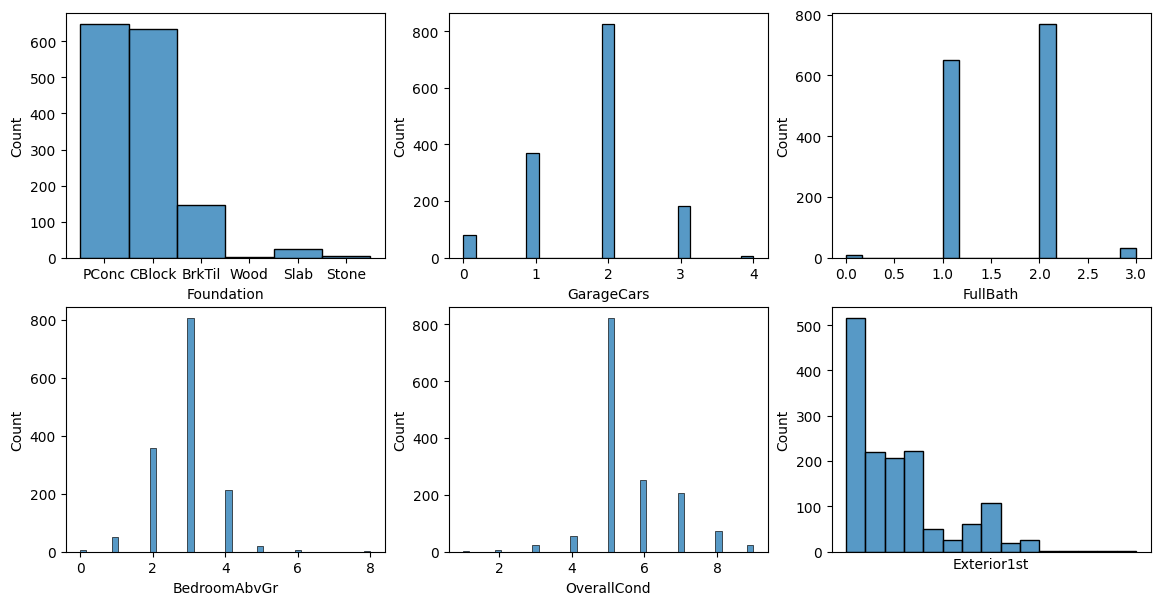

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(14,7))
sns.histplot(data=house_data, x="Foundation", ax= axs[0][0])

sns.histplot(data=house_data, x="GarageCars", ax= axs[0][1])

sns.histplot(data=house_data, x="FullBath", ax= axs[0][2])

sns.histplot(data=house_data, x="BedroomAbvGr", ax= axs[1][0])

sns.histplot(data=house_data, x="OverallCond", ax= axs[1][1])

sns.histplot(data=house_data, x="Exterior1st", ax= axs[1][2])
axs[1][2].set_xticks([])

<Axes: xlabel='GarageType', ylabel='Count'>

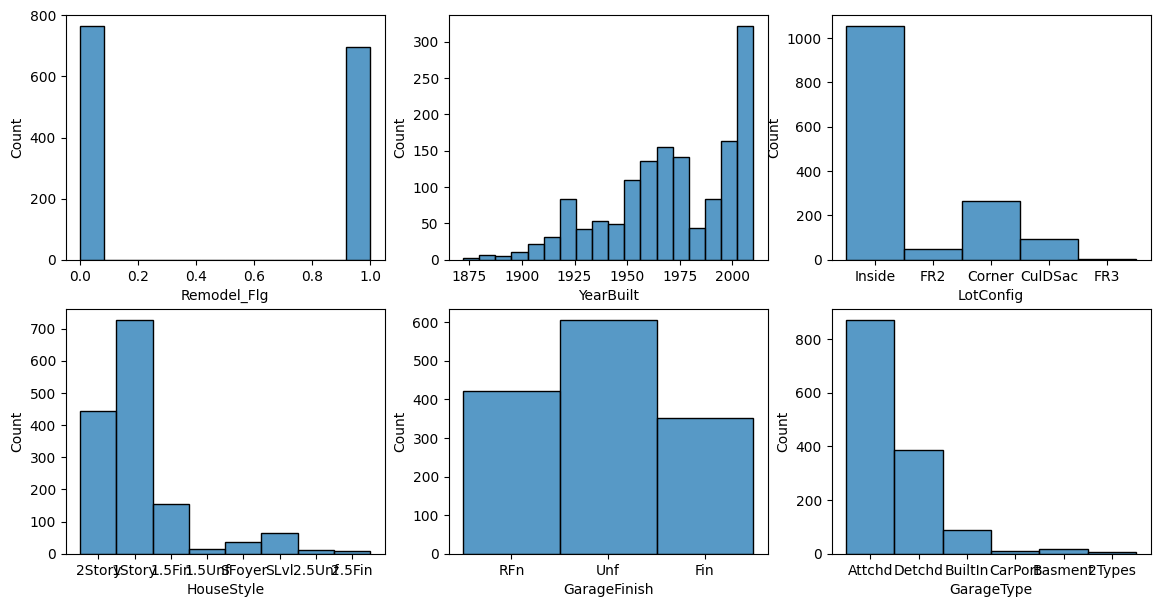

In [18]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(14,7))
sns.histplot(data=house_data, x="Remodel_Flg", ax= axs[0][0])

sns.histplot(data=house_data, x="YearBuilt", ax= axs[0][1])

sns.histplot(data=house_data, x="LotConfig", ax= axs[0][2])

sns.histplot(data=house_data, x="HouseStyle", ax= axs[1][0])

sns.histplot(data=house_data, x="GarageFinish", ax= axs[1][1])

sns.histplot(data=house_data, x="GarageType", ax= axs[1][2])

<Figure size 1000x600 with 0 Axes>

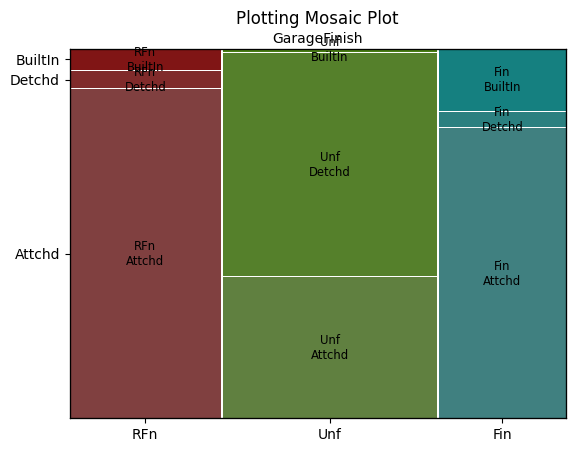

In [19]:
from statsmodels.graphics.mosaicplot import mosaic
def plot_mosaic(cat1, cat2, cat_name):
  plt.figure(figsize=(10,6))
  cdata = pd.DataFrame({cat_name[0]: cat1, cat_name[1]: cat2})
  mosaic(cdata,cat_name, gap=0.005, title='Plotting Mosaic Plot')
  plt.xlabel(cat_name[0])
  plt.ylabel(cat_name[1])
  plt.show()
df = house_data[house_data['GarageType'].isin(["Attchd", "Detchd", "BuiltIn"])]
plot_mosaic(df['GarageFinish'],
                        df['GarageType'],
                         ['GarageFinish', 'GarageType'])

####Step 1.4 Analyzing Variable Interactions

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp_house_data = house_data[house_data.LotArea < 150000]
scaled_house = scaler.fit_transform(tmp_house_data[numerical_variables])
df_scaled_house = pd.DataFrame(scaled_house, columns = numerical_variables)

In [21]:
for cat in ["Remodel_Flg", "HouseStyle", "OverallQual",
            "GarageFinish", "GarageType", "Foundation", "Exterior1st",
            "YearBuilt", "LotConfig", "GarageCars", "KitchenAbvGr","BedroomAbvGr", "FullBath" ]:
            df_scaled_house[cat] = tmp_house_data[cat]

In [22]:
df_scaled_house.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin', nan], dtype=object)

In [23]:
HouseStyle_Name_Map = {"1Story": "One Story",
       "1.5Fin":"1-1/2 Story: 2-Finished",
       "1.5Unf":"1-1/2 Story: 2-Unfinished",
       "2Story": "Two Story",
       "2.5Fin": "2-1/2 Story: 2-Finished",
       "2.5Unf": "2-1/2 Story: 2-Unfinished",
       "SFoyer": "Split Foyer",
       "SLvl":	 "Split Level"}

<Axes: xlabel='TotalBsmtSF', ylabel='2ndFlrSF'>

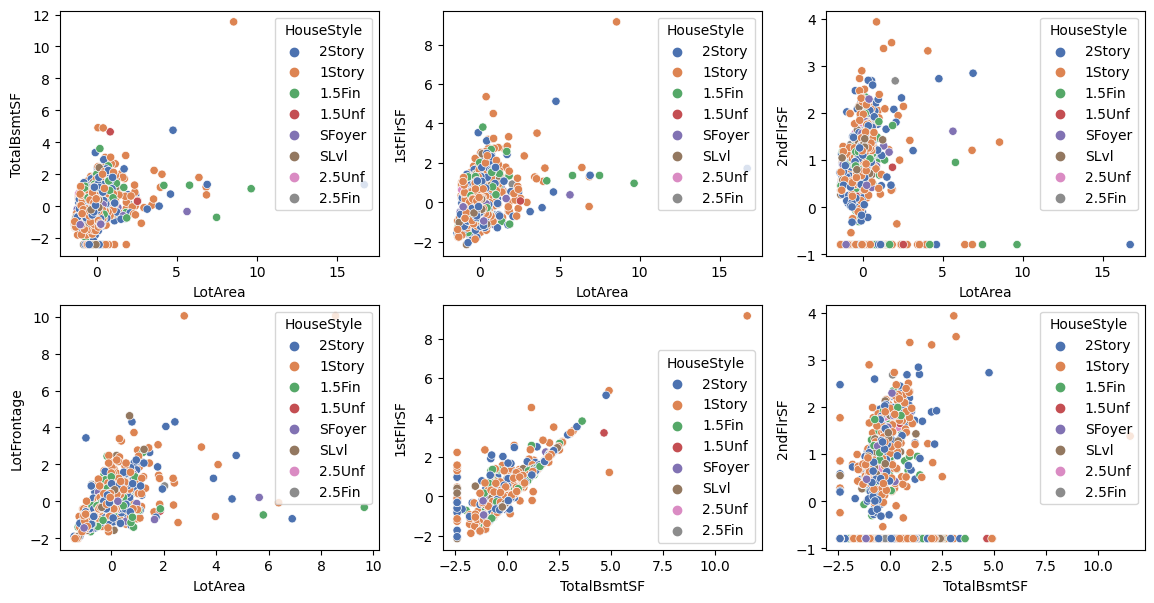

In [24]:
hue_var = "HouseStyle"
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize=(14,7))
sns.scatterplot(data=df_scaled_house, x="LotArea", y="TotalBsmtSF" ,hue= hue_var, ax= axs[0][0], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="1stFlrSF", hue= hue_var,ax= axs[0][1], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="2ndFlrSF", hue= hue_var,ax= axs[0][2], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="LotFrontage" , hue= hue_var,ax= axs[1][0], palette="deep")

sns.scatterplot(data=df_scaled_house, x="TotalBsmtSF", y="1stFlrSF", hue= hue_var,ax= axs[1][1], palette="deep")

sns.scatterplot(data=df_scaled_house, x="TotalBsmtSF", y="2ndFlrSF", hue= hue_var,ax= axs[1][2], palette="deep")

<Axes: xlabel='2ndFlrSF', ylabel='LotFrontage'>

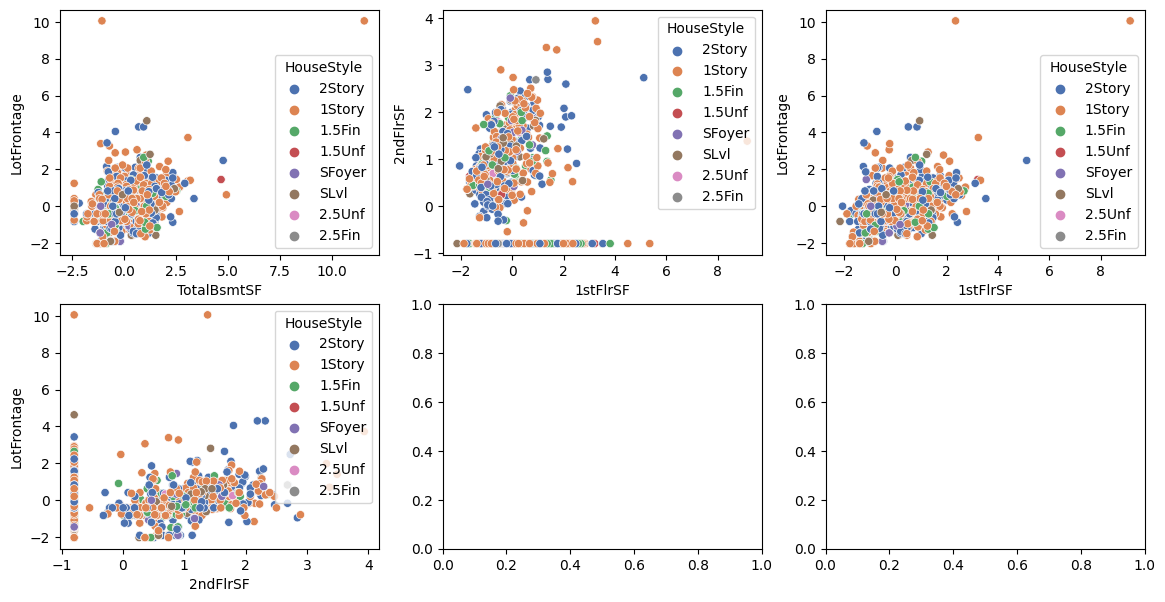

In [25]:
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize=(14,7))
sns.scatterplot(data=df_scaled_house, x="TotalBsmtSF", y="LotFrontage" , hue= hue_var,ax= axs[0][0], palette="deep")

sns.scatterplot(data=df_scaled_house, x="1stFlrSF", y="2ndFlrSF", hue= hue_var,ax= axs[0][1], palette="deep")

sns.scatterplot(data=df_scaled_house, x="1stFlrSF", y="LotFrontage", hue= hue_var,ax= axs[0][2], palette="deep")

sns.scatterplot(data=df_scaled_house, x="2ndFlrSF", y="LotFrontage", hue= hue_var,ax= axs[1][0], palette="deep")

<Axes: xlabel='LotArea', ylabel='FullBath'>

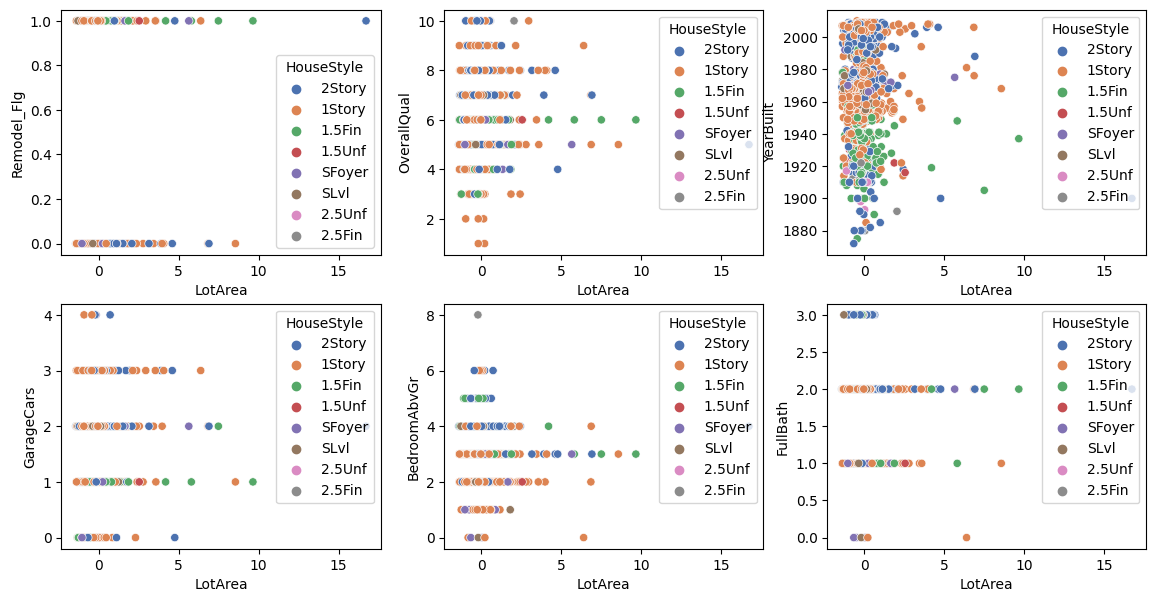

In [26]:
hue_var = "HouseStyle"
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize=(14,7))
sns.scatterplot(data=df_scaled_house, x="LotArea", y="Remodel_Flg" ,hue= hue_var, ax= axs[0][0], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="OverallQual", hue= hue_var,ax= axs[0][1], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="YearBuilt", hue= hue_var,ax= axs[0][2], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="GarageCars" , hue= hue_var,ax= axs[1][0], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="BedroomAbvGr", hue= hue_var,ax= axs[1][1], palette="deep")

sns.scatterplot(data=df_scaled_house, x="LotArea", y="FullBath", hue= hue_var,ax= axs[1][2], palette="deep")

###Step 2: Feature Engineering

In [27]:
categorical_variable = ["HouseStyle","OverallQual", "GarageFinish", "GarageType",
                        "Foundation","Exterior1st", "Remodel_Flg", "YearBuilt",
                        "LotConfig", "GarageCars", "BedroomAbvGr", "KitchenAbvGr", "FullBath", "OverallCond"]
#"1stFlrSF" removed
numerical_variables = ["LotArea", "TotalBsmtSF",  "2ndFlrSF", "LotFrontage"] #"1stFlrSF",

In [28]:
df_house_dataset = house_data[house_data.LotArea < 150000]

In [29]:
ordinal_variables = ["GarageCars", "FullBath", "BedroomAbvGr",
                     "OverallCond"]

nominal_variables = ["GarageFinish", "GarageType", "Foundation",
                     "Exterior1st", "Remodel_Flg", "YearBuilt",
                     "LotConfig"]

In [30]:
df_house_dataset = df_house_dataset[numerical_variables + categorical_variable].reset_index(drop = True)

In [31]:
df_house_dataset.columns[df_house_dataset.isnull().any()]

Index(['LotFrontage', 'GarageFinish', 'GarageType'], dtype='object')

In [32]:
"Total Number of Records", len(df_house_dataset), "Total Number of Non null Records", len(df_house_dataset.dropna())

('Total Number of Records', 1457, 'Total Number of Non null Records', 1126)

In [33]:
df_house_dataset = df_house_dataset.dropna().reset_index(drop = True)

####Step 2.1 Scale Numerical Variables

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
scaler = StandardScaler()
numerical_house_data = scaler.fit_transform(df_house_dataset[numerical_variables])
scaled_house_data = pd.DataFrame(numerical_house_data, columns = numerical_variables)

In [36]:
df_house_dataset[numerical_variables][:2]

,LotArea,TotalBsmtSF,2ndFlrSF,LotFrontage
0,8450,856,854,65.0
1,9600,1262,0,80.0


In [37]:
scaled_house_data[:2]

,LotArea,TotalBsmtSF,2ndFlrSF,LotFrontage
0,-0.279291,-0.498042,1.142448,-0.232451
1,-0.063426,0.415188,-0.805895,0.388768


In [38]:
minscaler = MinMaxScaler()
numerical_house_data = minscaler.fit_transform(df_house_dataset[numerical_variables])
min_scaled_house_data = pd.DataFrame(numerical_house_data, columns = numerical_variables)

In [39]:
min_scaled_house_data[:2]

,LotArea,TotalBsmtSF,2ndFlrSF,LotFrontage
0,0.102935,0.140098,0.413559,0.150685
1,0.119492,0.206547,0.000000,0.202055


####Step 2.2 Scale Ordinal Variables

In [40]:
minscaler1 = MinMaxScaler()
ordinal_house_data =  minscaler1.fit_transform(df_house_dataset[ordinal_variables])
ordinal_house_data = pd.DataFrame(ordinal_house_data, columns = ordinal_variables)

In [41]:
df_house_dataset[ordinal_variables][:2]

,GarageCars,FullBath,BedroomAbvGr,OverallCond
0,2,2,3,5
1,2,2,3,8


In [42]:
ordinal_house_data[:2]

,GarageCars,FullBath,BedroomAbvGr,OverallCond
0,0.333333,0.666667,0.5,0.428571
1,0.333333,0.666667,0.5,0.857143


####Step 2.3 Hot encoding Nominal Variables

In [43]:
nominal_house_data_list = []

for i,x in df_house_dataset[nominal_variables].nunique().iteritems():
  if x <= 2:
    nominal_house_data_list.append(pd.get_dummies(df_house_dataset[[i]],drop_first=True))
  else:
    nominal_house_data_list.append(pd.get_dummies(df_house_dataset[[i]],drop_first=False))


nominal_house_data = pd.concat(nominal_house_data_list,axis=1)

In [44]:
nominal_house_data[:2]

,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Foundation_BrkTil,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Remodel_Flg,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,2003,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1976,0,0,1,0,0


####Step 2.4 Prep for Analyzes and Clustering

In [45]:
df_house_feature_set = pd.concat([scaled_house_data,
                                  ordinal_house_data,
                                  nominal_house_data],axis=1)

In [46]:
df_house_feature_set.columns[df_house_feature_set.isnull().any()]

Index([], dtype='object')

In [47]:
df_house_feature_set["HouseStyle"] = df_house_dataset["HouseStyle"]

In [48]:
"Number of Features",len(df_house_feature_set.columns)

('Number of Features', 45)

###Step 3: Applying Dimensionality Reduction

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)
pca.fit(df_house_feature_set.drop(columns= "HouseStyle"))

PCA(n_components=2)

In [51]:
df_house_feature_set_pca = pca.transform(df_house_feature_set.drop(columns= "HouseStyle"))
print("original shape:   ", df_house_feature_set.shape)
print("transformed shape:", df_house_feature_set_pca.shape)

original shape:    (1126, 45)
transformed shape: (1126, 2)


In [52]:
pca.explained_variance_ratio_

array([0.9932581 , 0.00190775])

<Axes: >

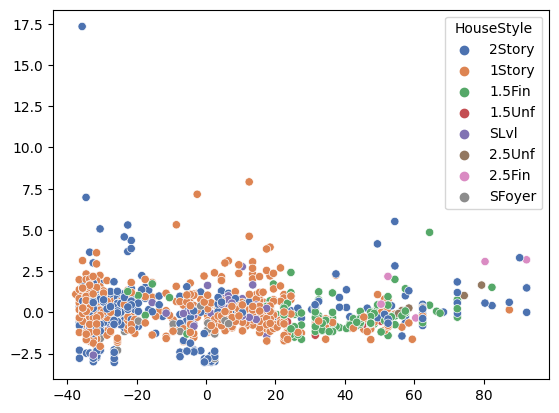

In [53]:
sns.scatterplot(x=df_house_feature_set_pca[:, 0],
                y=df_house_feature_set_pca[:, 1],
                hue=df_house_feature_set["HouseStyle"] ,
                palette="deep")

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)

In [56]:
df_house_feature_set_tsne = pd.DataFrame(tsne_model.fit_transform(df_house_feature_set.drop(columns= "HouseStyle")))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1126 samples in 0.000s...
[t-SNE] Computed neighbors for 1126 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1126
[t-SNE] Computed conditional probabilities for sample 1126 / 1126
[t-SNE] Mean sigma: 1.519949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.280178
[t-SNE] KL divergence after 500 iterations: 0.469964


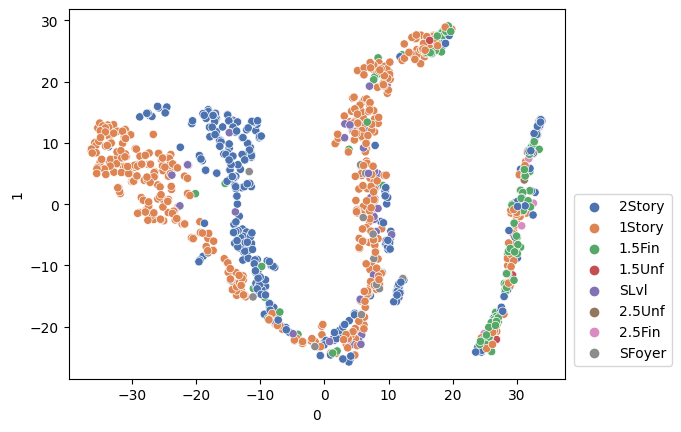

In [57]:
sns.scatterplot( x=df_house_feature_set_tsne[0],
                y=df_house_feature_set_tsne[1],
                 hue=df_house_feature_set["HouseStyle"] ,  palette="deep")
plt.legend(bbox_to_anchor=(1.02, 0.50), loc='upper left', borderaxespad=0)

###Step 4: Applying Clustering Algo

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from matplotlib import cm

In [59]:
results = dict()
k_cand = list(np.arange(5,55,5))
k_cand.extend(list(np.arange(50,500,50)))

In [60]:
for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_house_feature_set.drop(columns= "HouseStyle"))
    score0 = kmeans.inertia_
    score1 = silhouette_score(df_house_feature_set.drop(columns= "HouseStyle"),kmeans.labels_,metric='euclidean')
    score2 = silhouette_score(df_house_feature_set.drop(columns= "HouseStyle"),kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2}

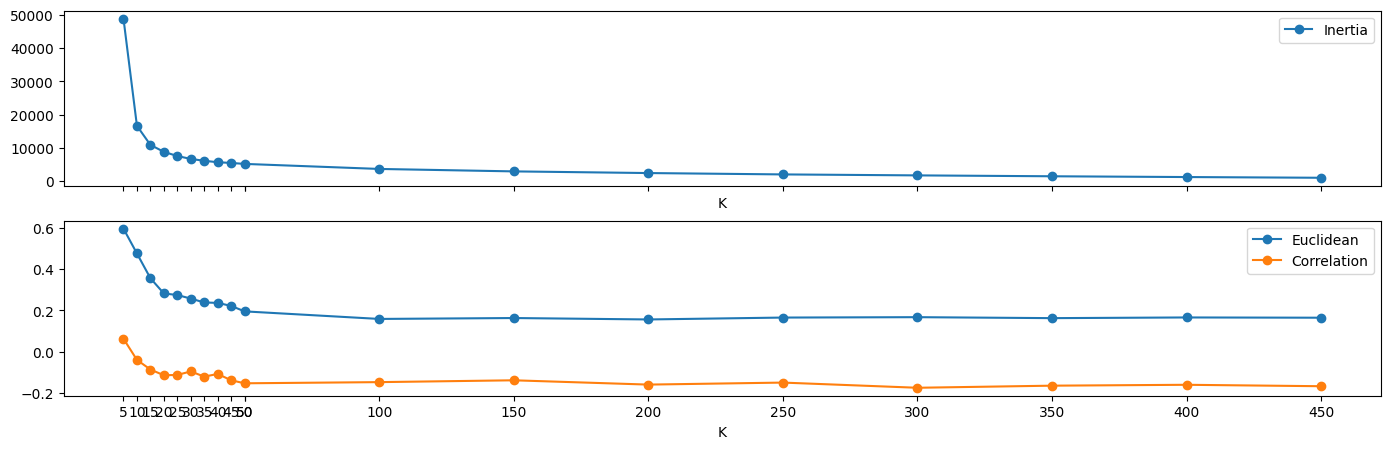

In [61]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=(17,5))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

In [62]:
df_house_feature_set_tsne['k'] = results[5]['k'].labels_
kmeans = results[5]['k']

<Axes: xlabel='0', ylabel='1'>

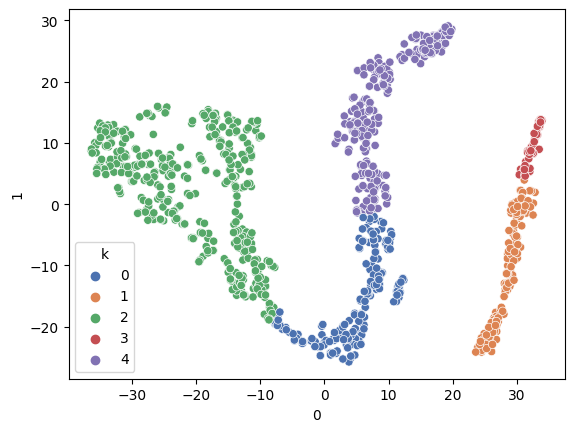

In [63]:
sns.scatterplot(x=df_house_feature_set_tsne[0],
                y=df_house_feature_set_tsne[1],
                hue=df_house_feature_set_tsne['k'] ,
                palette="deep", legend=True)

In [64]:
df_house_dataset['k'] = results[5]['k'].labels_

<Axes: xlabel='k', ylabel='LotFrontage'>

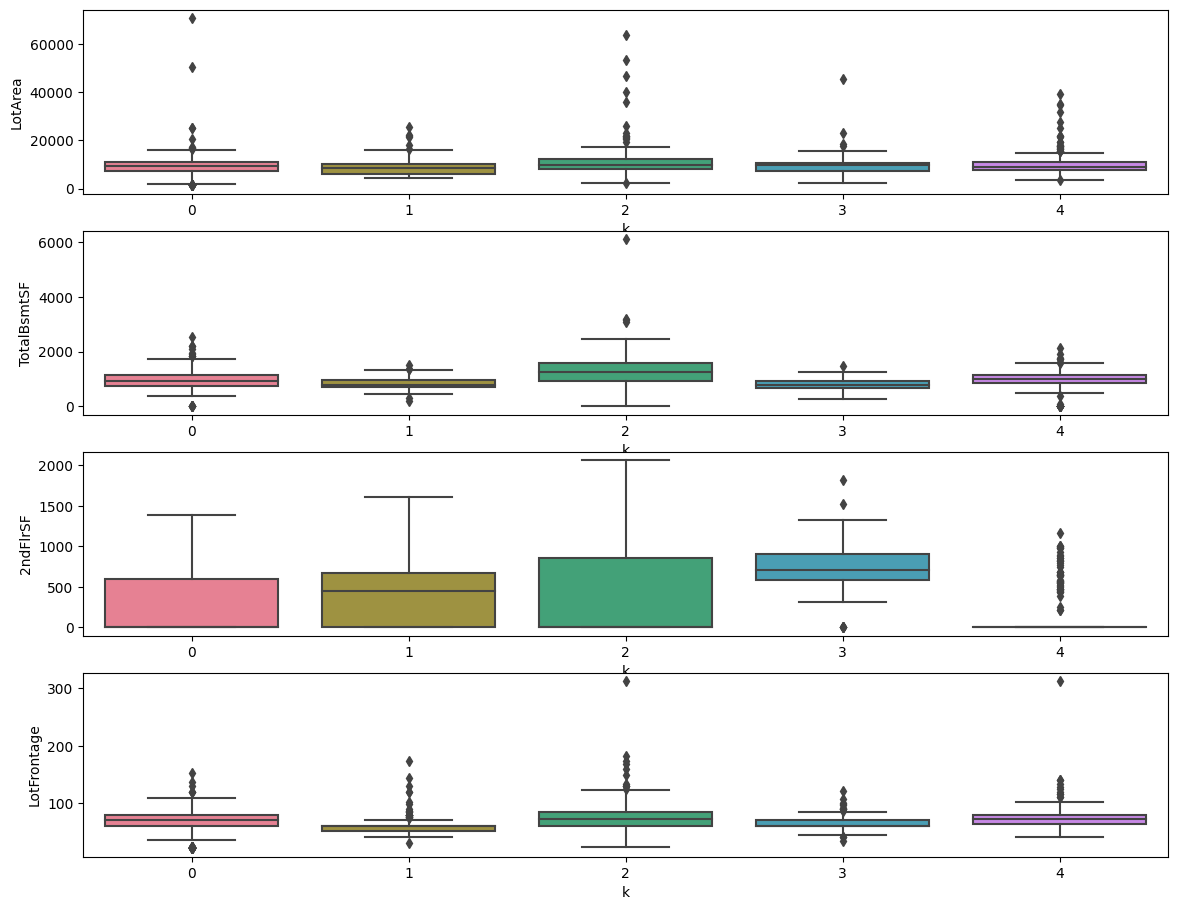

In [65]:
c = sns.color_palette("husl", 5)
fig, axs = plt.subplots(nrows = 4, figsize=(14,11))
sns.boxplot(data=df_house_dataset, x="k", y="LotArea" ,palette=c, ax= axs[0])
sns.boxplot(data=df_house_dataset, x="k", y="TotalBsmtSF" ,palette=c, ax= axs[1])
sns.boxplot(data=df_house_dataset, x="k", y="2ndFlrSF" ,palette=c, ax= axs[2])
sns.boxplot(data=df_house_dataset, x="k", y="LotFrontage" ,palette=c, ax= axs[3])

In [66]:
sns.color_palette("husl", 5)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

<Axes: xlabel='YearBuilt', ylabel='Count'>

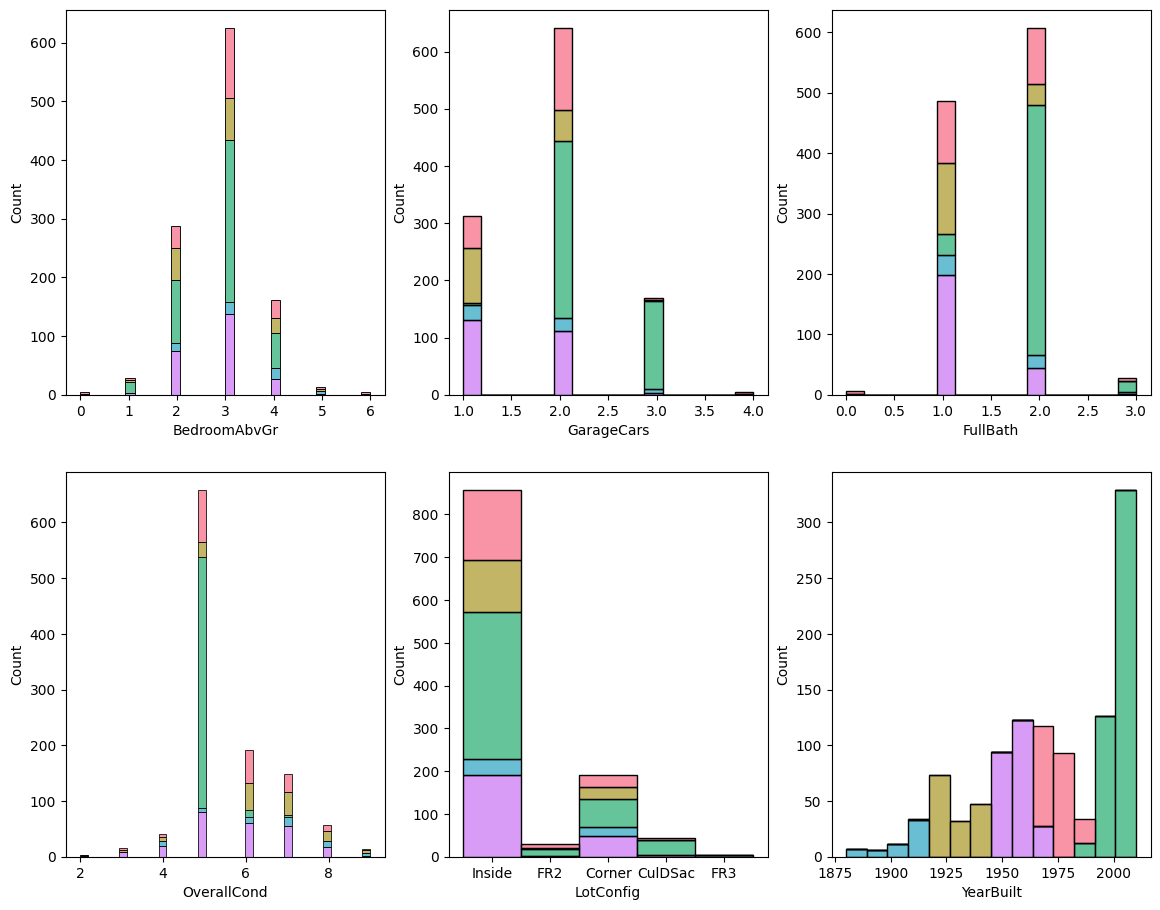

In [67]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(14,11))
c = sns.color_palette("husl", 5)
sns.histplot(data=df_house_dataset, x="BedroomAbvGr", hue="k", palette=c, legend=False, ax= axs[0][0], multiple="stack")
sns.histplot(data=df_house_dataset, x="GarageCars", hue="k", palette=c, legend=False, ax= axs[0][1], multiple="stack")
sns.histplot(data=df_house_dataset, x="FullBath", hue="k", palette=c, legend=False, ax= axs[0][2], multiple="stack")
sns.histplot(data=df_house_dataset, x="OverallCond", hue="k", palette=c, legend=False, ax= axs[1][0], multiple="stack")
sns.histplot(data=df_house_dataset, x="LotConfig", hue="k", palette=c, legend=False, ax= axs[1][1], multiple="stack")
sns.histplot(data=df_house_dataset, x="YearBuilt", hue="k", palette=c, legend=False, ax= axs[1][2], multiple="stack")

In [68]:
import plotly.express as px
fig = px.parallel_coordinates(df_house_dataset, color = 'k',
                              dimensions=['YearBuilt', 'k', 'OverallCond', 'LotArea'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [69]:
import plotly.express as px
fig = px.parallel_coordinates(df_house_dataset, color = 'k',
                              dimensions=['YearBuilt','k','BedroomAbvGr', 'FullBath', 'GarageCars'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [70]:
import plotly.express as px
fig = px.parallel_coordinates(df_house_dataset[df_house_dataset.k == 2], color = 'k',
                              dimensions=['YearBuilt','k','BedroomAbvGr', 'FullBath', 'GarageCars'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [71]:
df_house_feature_set_tsne['k'] = results[20]['k'].labels_
kmeans = results[20]['k']

<Axes: xlabel='0', ylabel='1'>

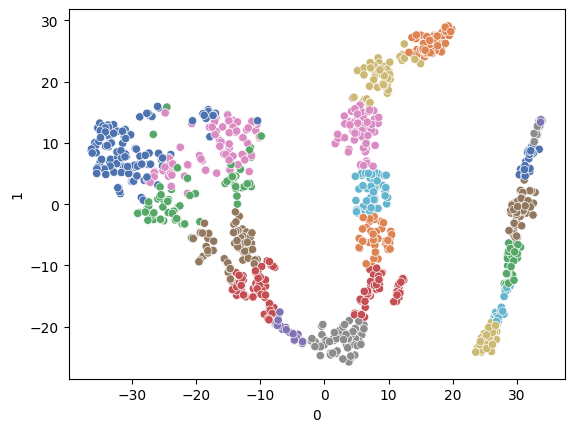

In [72]:
sns.scatterplot(x=df_house_feature_set_tsne[0],
                y=df_house_feature_set_tsne[1],
                hue=df_house_feature_set_tsne['k'] ,
                palette="deep", legend=False)

In [73]:
df_house_dataset['k'] = results[20]['k'].labels_

<Axes: xlabel='k', ylabel='LotFrontage'>

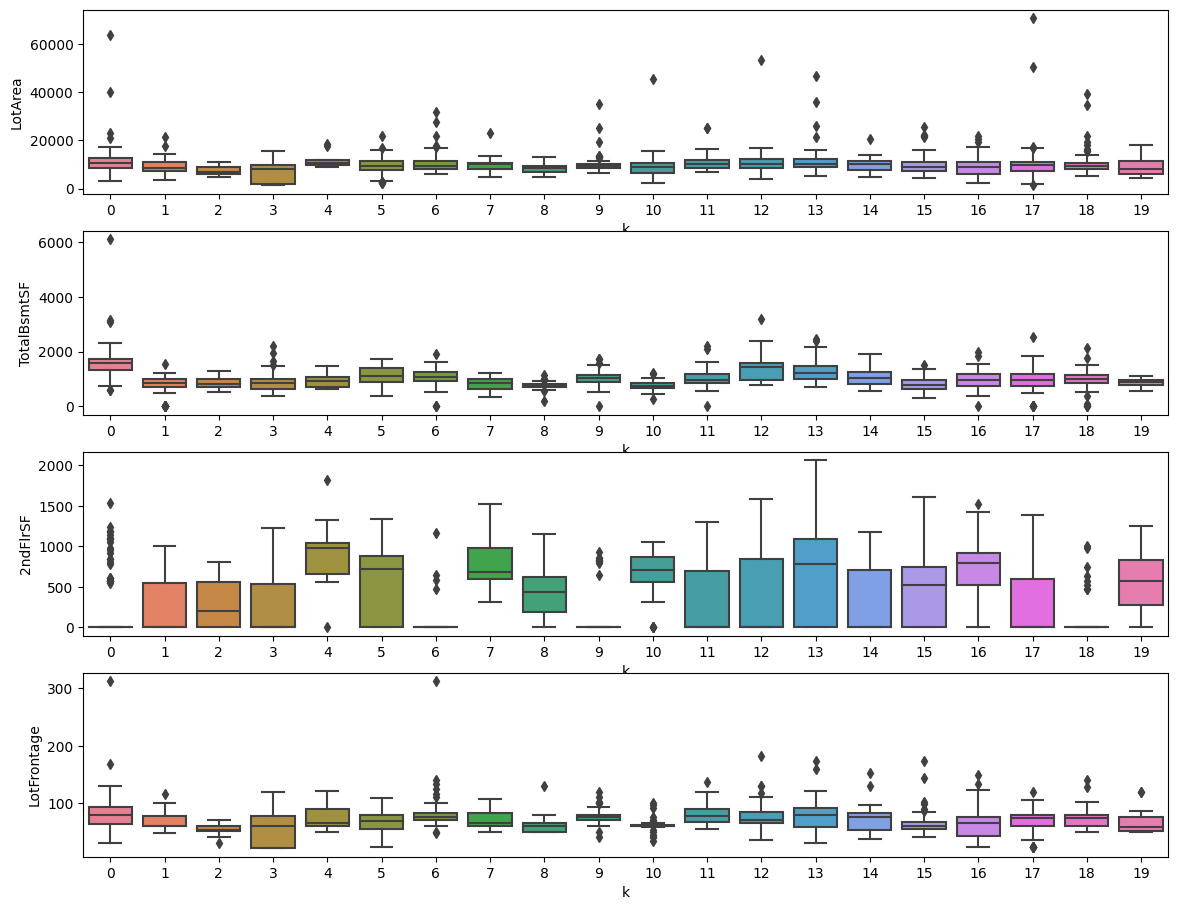

In [74]:
c = sns.color_palette("husl", 20)
fig, axs = plt.subplots(nrows = 4, figsize=(14,11))
sns.boxplot(data=df_house_dataset, x="k", y="LotArea" ,palette=c, ax= axs[0])
sns.boxplot(data=df_house_dataset, x="k", y="TotalBsmtSF" ,palette=c, ax= axs[1])
sns.boxplot(data=df_house_dataset, x="k", y="2ndFlrSF" ,palette=c, ax= axs[2])
sns.boxplot(data=df_house_dataset, x="k", y="LotFrontage" ,palette=c, ax= axs[3])

<Axes: xlabel='YearBuilt', ylabel='Count'>

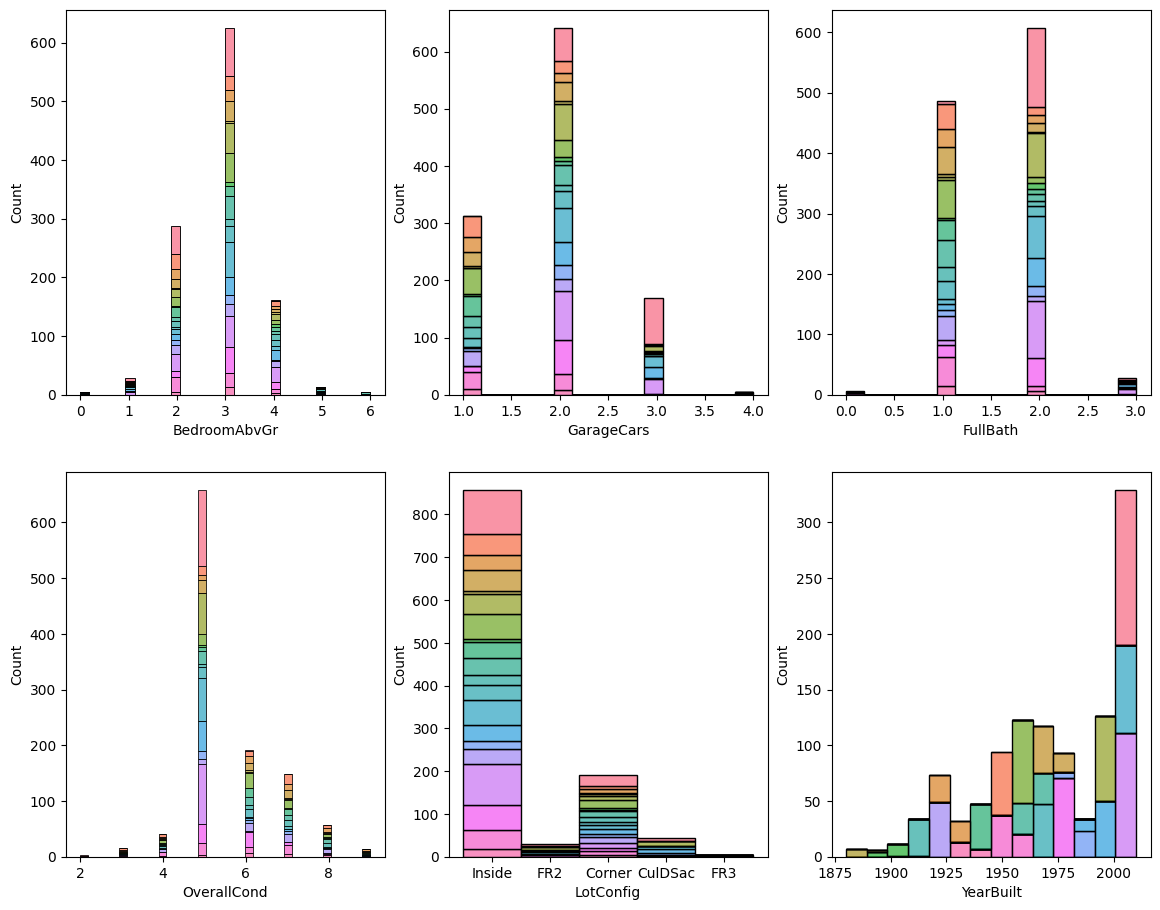

In [75]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(14,11))
c = sns.color_palette("husl", 20)
sns.histplot(data=df_house_dataset, x="BedroomAbvGr", hue="k", palette=c, legend=False, ax= axs[0][0], multiple="stack")
sns.histplot(data=df_house_dataset, x="GarageCars", hue="k", palette=c, legend=False, ax= axs[0][1], multiple="stack")
sns.histplot(data=df_house_dataset, x="FullBath", hue="k", palette=c, legend=False, ax= axs[0][2], multiple="stack")
sns.histplot(data=df_house_dataset, x="OverallCond", hue="k", palette=c, legend=False, ax= axs[1][0], multiple="stack")
sns.histplot(data=df_house_dataset, x="LotConfig", hue="k", palette=c, legend=False, ax= axs[1][1], multiple="stack")
sns.histplot(data=df_house_dataset, x="YearBuilt", hue="k", palette=c, legend=False, ax= axs[1][2], multiple="stack")

In [76]:
import plotly.express as px
fig = px.parallel_coordinates(df_house_dataset, color = 'k',
                              dimensions=['YearBuilt', 'k', 'OverallCond', 'LotArea'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()